In [2]:
# Library imports
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib
from imblearn.metrics import classification_report_imbalanced
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
df = pd.read_csv('water_quality_data.csv')

In [4]:
# Display first few rows of the dataset
print(df.head())
print("")

# Check dimensions of the dataset
print(df.shape)
print("")

# Overview of columns and data types
print(df.info())

   Temperature (°C)        pH   TDS (ppm)   EC (µS/cm)   Quality
0         26.049602  6.868629  221.594397  1693.967893      good
1         22.300665  7.667617  389.625204  1449.911211  moderate
2         21.764097  6.273804  269.091813  1662.353847       bad
3         24.935946  8.088360  128.355704  1470.371481  moderate
4          4.765248  6.300963  145.308343  1467.765692       bad

(5000, 5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temperature (°C)  5000 non-null   float64
 1   pH                5000 non-null   float64
 2   TDS (ppm)         5000 non-null   float64
 3   EC (µS/cm)        5000 non-null   float64
 4   Quality           5000 non-null   object 
dtypes: float64(4), object(1)
memory usage: 195.4+ KB
None


In [5]:
# Summary statistics
print(df.describe())

       Temperature (°C)           pH    TDS (ppm)   EC (µS/cm)
count       5000.000000  5000.000000  5000.000000  5000.000000
mean          15.235620     7.225172   553.098181  1049.264724
std            8.763163     0.725481   259.529358   548.986281
min            0.000160     6.000590   100.029879   100.840471
25%            7.539387     6.593400   332.279923   564.771893
50%           15.292613     7.208472   554.679568  1040.319267
75%           22.946473     7.839571   775.326975  1528.062114
max           29.995207     8.499884   999.990404  1999.207788


In [6]:
# Count missing values
print(df.isnull().sum())

Temperature (°C)    0
pH                  0
TDS (ppm)           0
EC (µS/cm)          0
Quality             0
dtype: int64


In [7]:
# Handle missing values (e.g., fill with mean, median, or mode)
df['Temperature (°C)'] = df['Temperature (°C)'].fillna(df['Temperature (°C)'].mean())
df['pH'] = df['pH'].fillna(df['pH'].mean())
df['TDS (ppm)'] = df['TDS (ppm)'].fillna(df['TDS (ppm)'].mean())
df['EC (µS/cm)'] = df['EC (µS/cm)'].fillna(df['EC (µS/cm)'].mean())

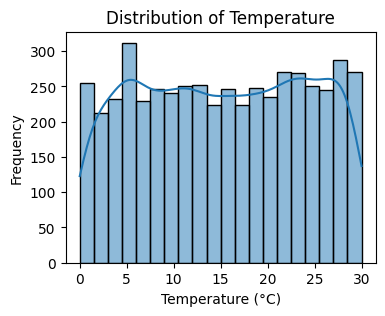

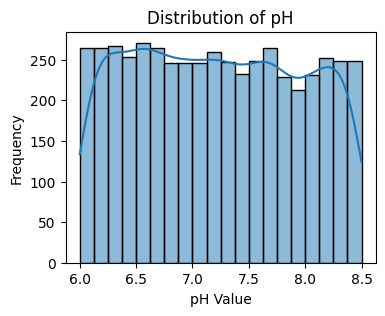

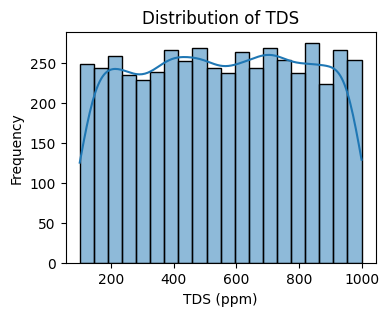

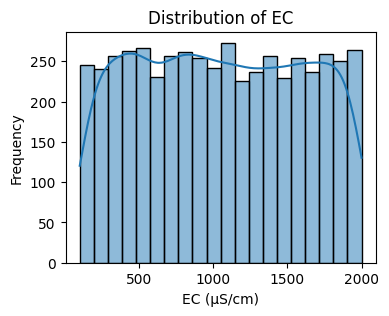

In [8]:
plt.figure(figsize=(4, 3))
sns.histplot(df['Temperature (°C)'], bins=20, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['pH'], bins=20, kde=True)
plt.title('Distribution of pH')
plt.xlabel('pH Value')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['TDS (ppm)'], bins=20, kde=True)
plt.title('Distribution of TDS')
plt.xlabel('TDS (ppm)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(4, 3))
sns.histplot(df['EC (µS/cm)'], bins=20, kde=True)
plt.title('Distribution of EC')
plt.xlabel('EC (µS/cm)')
plt.ylabel('Frequency')
plt.show()

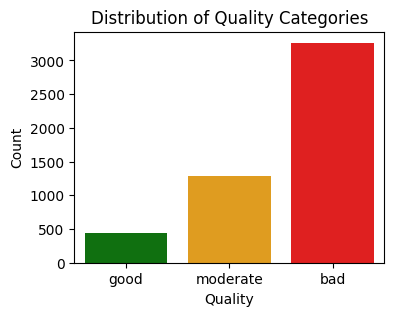

In [9]:
# Calculate value counts of 'Quality' categories
quality_counts = df['Quality'].value_counts()

# Plotting the distribution of 'Quality' categories
plt.figure(figsize=(4, 3))
sns.countplot(x='Quality', data=df, hue='Quality', palette=['green', 'orange', 'red'], legend=False)
plt.title('Distribution of Quality Categories')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

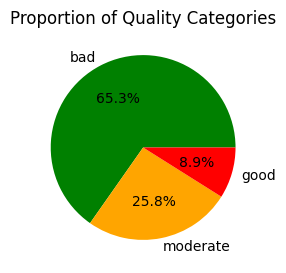

In [10]:
# Plotting a pie chart of 'Quality' categories
plt.figure(figsize=(4, 3))
plt.pie(quality_counts, labels=quality_counts.index, autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title('Proportion of Quality Categories')
plt.show()

In [11]:
# Feature and target selection
X = df[['Temperature (°C)', 'pH', 'TDS (ppm)', 'EC (µS/cm)']]
y = df['Quality']

# Encode the target variable
y = y.map({'bad': 0, 'moderate': 1, 'good': 2})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [13]:
# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV with the defined parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

In [14]:
# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [15]:
# Print the best parameters and best score found by GridSearchCV
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.2f}".format(grid_search.best_score_))

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)

# Print classification report and accuracy score for the best model
print("Test set accuracy of best model: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 1.00
Test set accuracy of best model: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       981
           1       1.00      1.00      1.00       372
           2       1.00      1.00      1.00       147

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [17]:
# Save the best model to a file
joblib.dump(best_model, 'water_quality_model.pkl')

['water_quality_model.pkl']